***
***
***

<br><h2>Session 7a | Hyperparameter Tuning</h2>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Preparation</h3><br>
Run the following code to import necessary packages, load data, and set display options for pandas. 

In [ ]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


########################################
# loading data and setting display options
########################################
# loading data
titanic = pd.read_excel('titanic_feature_rich.xlsx')


# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ['age', 'sibsp', 'parch', 'fare', 'm_age', 'm_cabin',
                   'm_home.dest', 'potential_youth', 'child',
                   'number_of_names', 'pclass_1', 'pclass_2', 'female'],
 
 # significant variables only
 'logit_sig'    : ['age' , 'sibsp', 'm_cabin', 'number_of_names',
                   'pclass_1', 'female']

}


########################################
# checking previous model performances
########################################
model_performance

***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [ ]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

***
***

<br>
<strong>Challenge 1</strong><br>
Complete the code to split the dataset into training and validation sets.

In [ ]:
# train/test split with the logit_sig variables
titanic_data   =  titanic.loc[ : , candidate_dict['logit_sig']]
titanic_target =  titanic.loc[ : , 'm_boat']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 802,
            test_size    = 0.25,
            stratify     = titanic_target)

***

<strong>Returning to the Analytics Kitchen</strong><br>
In an earlier session, we discussed model selection through various appliances that can be used for cooking. Hyperparameter tuning can be thought of as an extension of our previous discussion. For example, if we wanted to cook something in the oven, how hot should the oven be in order to get the best results? How does this compare to using a microwave given its best settings for the job (time, wattage, etc.)?<br><br>
In the same way that we might adjust the temperature of an oven, we can make adjustments to the <strong>hyperparameters</strong> of a machine learning algorithm in order to optimize its results. <a href = "https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)">This Wikipedia page</a> does an excellent job of defining a hyperparameter as: <em>a parameter whose value is set before the learning process begins</em>. In other words, these are arguments that are set before a model is fit and predictions are made. For example, the number of neighbors in a KNN model (<em>n_neighbors</em>) is a hyperparameter. When we ran a function to determine the optimal number of neighbors, we were tuning a hyperparameter.<br><br>
Hyperparameters can be found in the optional arguments of a model object. To illustrate, let's observe the help( ) documentation for <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a> from <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">sklearn.linear_model</a>.

In [ ]:
help(LogisticRegression)

***

<br>
<strong>Optional Arguments v. Hyperparameters</strong><br>
As can be observed, there are quite a few optional arguments for the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a> method. Of these arguments, hyperparameters are the ones we could adjust to optimize the performance of a model. Let's begin by tuning <strong>C</strong> and <strong>warm_start</strong>.
<br><br>
<strong>Note:</strong> The optimal value for each hyperparameter depends on the data going into the model. Adding or removing features will likely change their values to some extent.<br><br><br>
<strong>Logistic Regression with Default Hyperparameters</strong>

In [ ]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 802)

***

In [ ]:
# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

***
***

<br>
<h3>Part II: Hyperparameter Tuning with GridSearchCV</h3><br>

We could manually analyze each combination of hyperparameter values one by one, but that would take a very long time. Instead, we can automate this process using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV">GridSearchCV</a> from scikit-learn.<br><br>
<strong>Note:</strong> GridSearchCV searches in an exhaustive way, meaning it will compute using every combination of hyperparameters it is given. <strong>This can take a LONG time.</strong> To alleviate this, make sure your parameter space is reasonably small. Also note that there is another tool in scikit learn for automated hyperparameter optimization. This tool is discussed in the <a href="https://www.datacamp.com/">DataCamp</a> content for Checkpoint 1.<br><br>
<u>Things to Notice</u><br>
* It is likely that the scoring results from GridSearchCV will not be the same as when building a model based on the best combination of hyperparameters. This is normal when using AUC for optimization. Even though there is a difference, hyperparameter results are still optimized.<br><br>
* GridSearchCV does not require a predict step<br><br>
* (beyond scope) make_scorer is being used to better align GridSearchCV AUC results with model AUC results.

In [ ]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 802)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(titanic_data, titanic_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

***
***

<br>
<strong>Behind the scenes of GridSearchCV</strong><br>
Run the following code to see a summary of what happened behind the scenes of GridSearchCV.

In [ ]:
lr_tuned_cv.cv_results_

***
***

<br>
<strong>Logistic Regression with Tuned Hyperparameters</strong><br>
Let's rebuild our model using the tuned results from GridSearchCV. Note that we can view all of the parameters of our model from GridSearchCV by calling <strong>lr_tuned_cv.best_estimator_</strong>.

In [ ]:
lr_tuned_cv.best_estimator_

***
***

<br>
<strong>Challenge 2</strong><br>
Complete the code to predict and score a logistic regression model using <strong>lr_tuned_cv.best_estimator_</strong>.

In [ ]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

***
***

<br>
<strong>Challenge 3</strong><br>
Complete the code to write the results of the tuned logistic model to model_performance.

In [ ]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# checking the results
model_performance

***
***

<br>
<h3>Part III: Hyperparameter Tuning on Classification Trees</h3><br>
<strong>Challenge 4</strong><br>
With your team, develop a tuned classification tree model using GridSearchCV. The following help( ) file may be useful in completing this challenge.

In [ ]:
help(DecisionTreeClassifier)

***

In [13]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(titanic_data, titanic_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'splitter': 'random'}
Tuned Training AUC: 0.7734


***
***

<br>
<strong>Challenge 5</strong><br>
Build a classification tree model based on the hyperparameter tuning results.

In [14]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7951
Testing  ACCURACY: 0.7931
AUC Score        : 0.765


***
***

<br>
<strong>Challenge 6</strong><br>
Write the results of the tuned classification model to model_performance.

In [15]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.7670,0.7701,0.7590
1,KNN Classification,0.7939,0.7548,0.7309
2,Full Tree,0.9193,0.7050,0.6898
3,Pruned Tree,0.7785,0.7816,0.7525
4,Tuned LR,0.7644,0.7778,0.7696
5,Tuned Tree,0.7951,0.7931,0.7650


***
***

<br>
<strong>Challenge 7</strong> (optional)<br>
Display the tree graphically.

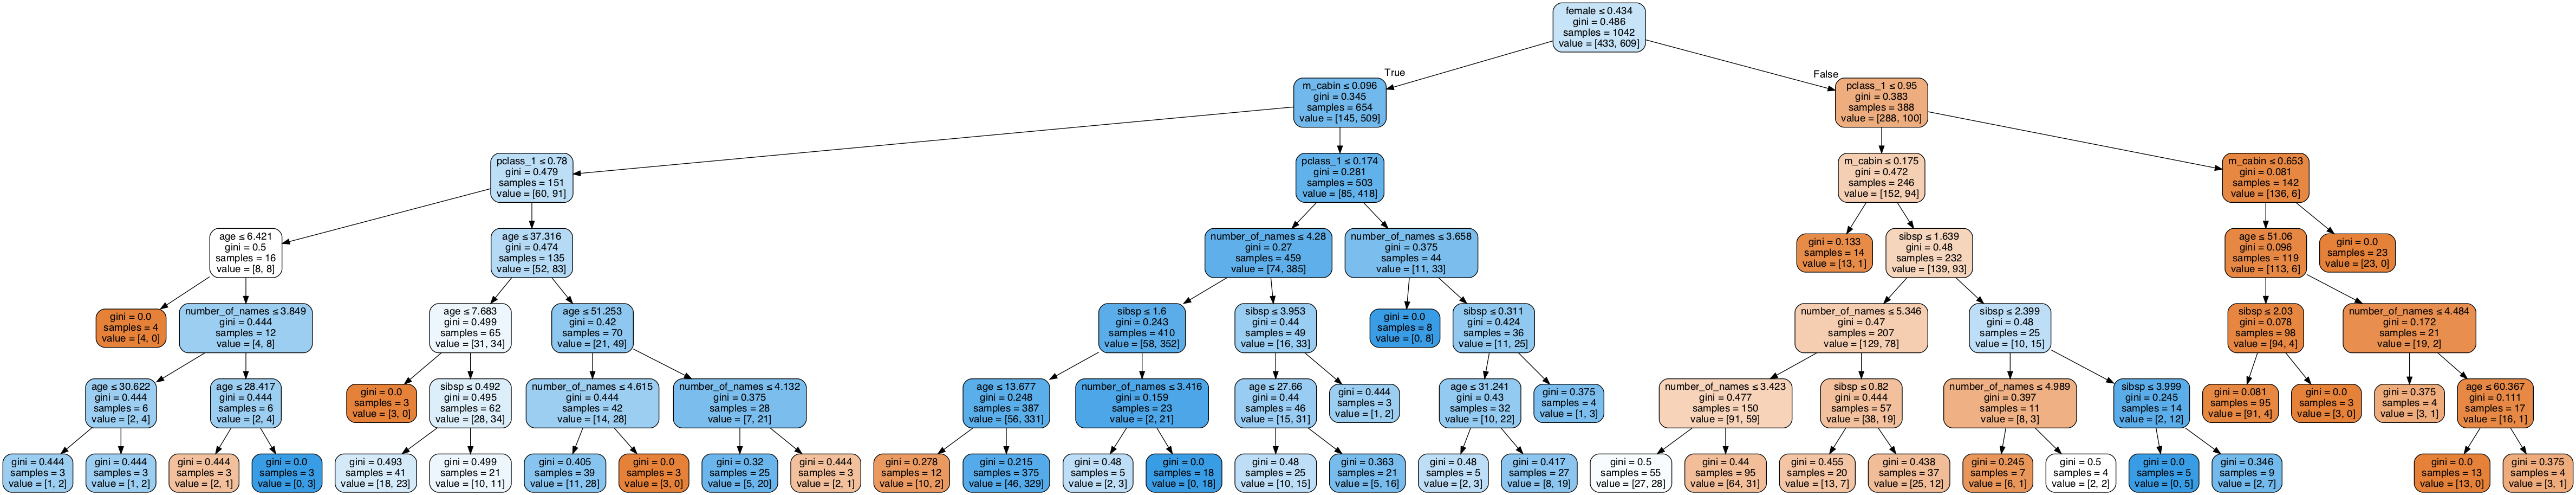

In [16]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = titanic_data,
             height = 2000,
             width  = 2000)

***

<br>

Run the following code to save model_performance as an Excel file.

In [17]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)